# Topic modelling using Gensim’s LDA (Latent Dirichlet Allocation) model
Topic modelling is a text mininig technique for discovery of general "topics" or themes in a collection of text documents [(Blei 2012)](http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf).

* Each topic is a distribution over words
* Each document is a mixture of corpus-wide topics
* Each word is drawn from one of the topics

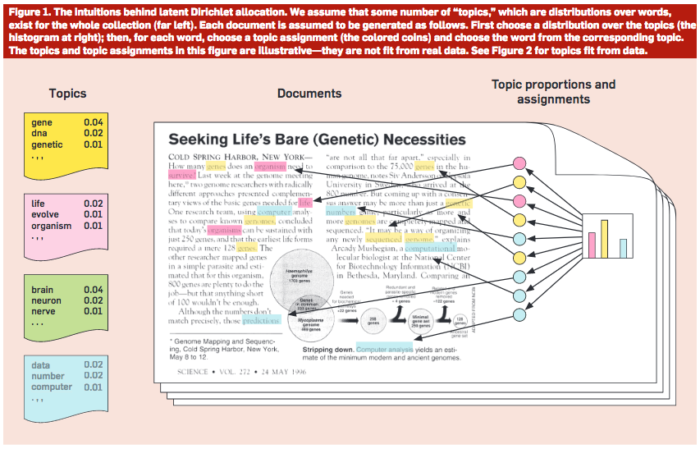

### Datasets 
We will train the LDA model on two datasets: 

Part 1. A toy example dataset comprising a collection of few sentences

Part 2. [Open dataset of recent tweets about Covid-19 vaccine deposited on Kaggle](https://www.kaggle.com/gpreda/pfizer-vaccine-tweets).

### Install and import libraries

In [11]:
# Data analysis and vis 
import pandas as pd
import numpy as np
import seaborn as sns

# Text preprocessing
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Importing Gensim
#! pip install gensim # Uncomment if you need to install gensim
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary # Create a dictionary representation of the documents
from gensim.models import Phrases # Compute bigrams
from gensim.models import LdaModel # Train LDA model
from gensim.models.coherencemodel import CoherenceModel

# Interactive topic model visualization
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/valentindanchev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/valentindanchev/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/valentindanchev/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


Defaulting to user installation because normal site-packages is not writeable


## Part 1: Running LDA Model on Toy example

Let's first create a toy dataset 

In [12]:
# A conveninet sample of sentences about Covid vaccine from BBC, Google's Health Info
doc1 = "The threat of vaccine nationalism"
doc2 = "Vaccine nationalism means that poor countries will be left behind"
doc3 = "Is vaccine nationalism an obstacle or an obligation?"
doc4 = "World Health Organization said vaccine nationalism could prolong the pandemic"
doc5 = "Which vaccine is being used in UK?"
doc6 = "Who should not get Covid vaccine?"
doc7 = "How many injections do you need for the Oxford vaccine?"
doc8 = "Does vaccine stop you getting Covid?"
doc9 = "Who is eligible to get the COVID-19 vaccine"

In [13]:
docs = [doc1, doc2, doc3, doc4, doc5, doc6, doc7, doc8, doc9]
docs

['The threat of vaccine nationalism',
 'Vaccine nationalism means that poor countries will be left behind',
 'Is vaccine nationalism an obstacle or an obligation?',
 'World Health Organization said vaccine nationalism could prolong the pandemic',
 'Which vaccine is being used in UK?',
 'Who should not get Covid vaccine?',
 'How many injections do you need for the Oxford vaccine?',
 'Does vaccine stop you getting Covid?',
 'Who is eligible to get the COVID-19 vaccine']

### Text preprocessing

In [14]:
# Define a function for cleaning the documents via NLTK—remove stop words, punctuation, and normalise tokens 
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [15]:
# Clean the documents
clean_docs = [clean(doc).split() for doc in docs]

In [16]:
clean_docs

[['threat', 'vaccine', 'nationalism'],
 ['vaccine', 'nationalism', 'mean', 'poor', 'country', 'left', 'behind'],
 ['vaccine', 'nationalism', 'obstacle', 'obligation'],
 ['world',
  'health',
  'organization',
  'said',
  'vaccine',
  'nationalism',
  'could',
  'prolong',
  'pandemic'],
 ['vaccine', 'used', 'uk'],
 ['get', 'covid', 'vaccine'],
 ['many', 'injection', 'need', 'oxford', 'vaccine'],
 ['vaccine', 'stop', 'getting', 'covid'],
 ['eligible', 'get', 'covid19', 'vaccine']]

In [17]:
# Importing gensim and the LDA models
import gensim
from gensim import corpora, models

# Creating the term dictionary of our corpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(clean_docs)

# Use the dictionary created above to convert the documents into document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_docs]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(0, 1), (2, 1), (8, 1), (9, 1)],
 [(0, 1),
  (2, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1)],
 [(2, 1), (17, 1), (18, 1)],
 [(2, 1), (19, 1), (20, 1)],
 [(2, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(2, 1), (19, 1), (25, 1), (26, 1)],
 [(2, 1), (20, 1), (27, 1), (28, 1)]]

### Running the LDA model

Parameters of the `models.ldamodel.LdaModel` function in `Gensim`
* `corpus` Document-terms matrix.

* `num_topics` The number of requested latent topics to be extracted from the training corpus.

* `id2word` Mapping from word IDs to words (via `gensim.corpora.dictionary.Dictionary`. It is used to determine the vocabulary size and topic printing.

In [18]:
# LDA model using gensim library

num_topics = 3
LDAModel = models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary, passes=50)

# Resulting topics—show the topic to terms distribution
print(LDAModel.print_topics(num_topics=num_topics, num_words=3))

[(0, '0.158*"vaccine" + 0.069*"covid" + 0.040*"could"'), (1, '0.142*"nationalism" + 0.140*"vaccine" + 0.080*"obstacle"'), (2, '0.113*"vaccine" + 0.066*"get" + 0.064*"mean"')]


### Examining the LDA output

In [19]:
# Get the probability for each word in each topic
# Term-topic matrix learned during inference with the following shape: number of topics by vocabulary size

LDAModel.get_topics()

array([[0.03886692, 0.0099504 , 0.15838748, 0.00994212, 0.00994212,
        0.00994212, 0.00994212, 0.00994212, 0.00994546, 0.00994546,
        0.03970411, 0.03970411, 0.03970411, 0.03970411, 0.03970411,
        0.03970411, 0.03970411, 0.03964016, 0.03964016, 0.06945357,
        0.03855124, 0.03968524, 0.03968524, 0.03968524, 0.03968524,
        0.03966977, 0.03966977, 0.00994957, 0.00994957],
       [0.14158866, 0.07958855, 0.14012071, 0.0199505 , 0.0199505 ,
        0.01995051, 0.01995049, 0.0199505 , 0.07961286, 0.07961286,
        0.01996128, 0.01996128, 0.01996128, 0.01996128, 0.01996128,
        0.01996128, 0.01996128, 0.02003032, 0.02003032, 0.02000828,
        0.02008168, 0.01997884, 0.01997884, 0.01997883, 0.01997884,
        0.01999636, 0.01999636, 0.01996813, 0.01996813],
       [0.06403205, 0.01613104, 0.11301521, 0.06433433, 0.06433433,
        0.06433433, 0.06433433, 0.06433433, 0.0161194 , 0.0161194 ,
        0.0161163 , 0.0161163 , 0.0161163 , 0.0161163 , 0.01611631,
  

In [20]:
# Get the top terms in a topic

LDAModel.get_topic_terms(1)

[(0, 0.14158866),
 (2, 0.14012071),
 (9, 0.07961286),
 (8, 0.07961286),
 (1, 0.07958855),
 (20, 0.020081682),
 (17, 0.020030323),
 (18, 0.020030322),
 (19, 0.020008283),
 (25, 0.019996362)]

In [21]:
# See top 20 words in a topic
top_topics = LDAModel.top_topics(doc_term_matrix) 
top_topics

[([(0.15838748, 'vaccine'),
   (0.06945357, 'covid'),
   (0.039704114, 'could'),
   (0.03970411, 'world'),
   (0.03970411, 'health'),
   (0.03970411, 'organization'),
   (0.03970411, 'pandemic'),
   (0.03970411, 'said'),
   (0.039704107, 'prolong'),
   (0.039685242, 'oxford'),
   (0.039685242, 'need'),
   (0.039685242, 'many'),
   (0.039685242, 'injection'),
   (0.03966977, 'stop'),
   (0.03966977, 'getting'),
   (0.039640162, 'uk'),
   (0.039640162, 'used'),
   (0.038866922, 'nationalism'),
   (0.038551245, 'get'),
   (0.009950397, 'threat')],
  -17.82497057871108),
 ([(0.11301521, 'vaccine'),
   (0.06616615, 'get'),
   (0.06433433, 'mean'),
   (0.064334325, 'behind'),
   (0.064334325, 'country'),
   (0.064334325, 'left'),
   (0.064334325, 'poor'),
   (0.064307995, 'eligible'),
   (0.064307995, 'covid19'),
   (0.06403205, 'nationalism'),
   (0.016169243, 'covid'),
   (0.016164051, 'uk'),
   (0.01616405, 'used'),
   (0.016143555, 'getting'),
   (0.016143555, 'stop'),
   (0.016132666, '

In [22]:
# Compute topic coherence and average topic coherence 
# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.

avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -19.0591.
[([(0.15838748, 'vaccine'),
   (0.06945357, 'covid'),
   (0.039704114, 'could'),
   (0.03970411, 'world'),
   (0.03970411, 'health'),
   (0.03970411, 'organization'),
   (0.03970411, 'pandemic'),
   (0.03970411, 'said'),
   (0.039704107, 'prolong'),
   (0.039685242, 'oxford'),
   (0.039685242, 'need'),
   (0.039685242, 'many'),
   (0.039685242, 'injection'),
   (0.03966977, 'stop'),
   (0.03966977, 'getting'),
   (0.039640162, 'uk'),
   (0.039640162, 'used'),
   (0.038866922, 'nationalism'),
   (0.038551245, 'get'),
   (0.009950397, 'threat')],
  -17.82497057871108),
 ([(0.11301521, 'vaccine'),
   (0.06616615, 'get'),
   (0.06433433, 'mean'),
   (0.064334325, 'behind'),
   (0.064334325, 'country'),
   (0.064334325, 'left'),
   (0.064334325, 'poor'),
   (0.064307995, 'eligible'),
   (0.064307995, 'covid19'),
   (0.06403205, 'nationalism'),
   (0.016169243, 'covid'),
   (0.016164051, 'uk'),
   (0.01616405, 'used'),
   (0.016143555, 'getting'),
   (0.016

In [23]:
# Get the topic distribution for one document in your corpus, for example document 0 in your corpus
get_document_topics = LDAModel.get_document_topics(doc_term_matrix)
print(get_document_topics[0])

[(0, 0.09092861), (1, 0.82003325), (2, 0.08903814)]


In [24]:
# Get the topic distribution for all documents in your corpus
# Columns represent topics and rows represent documents
get_document_topics = [LDAModel.get_document_topics(item) for item in doc_term_matrix]
get_document_topics

[[(0, 0.0909288), (1, 0.8200359), (2, 0.0890353)],
 [(0, 0.043832757), (1, 0.046453003), (2, 0.9097142)],
 [(0, 0.07089579), (1, 0.85913724), (2, 0.069967024)],
 [(0, 0.9273917), (1, 0.03764245), (2, 0.034965865)],
 [(0, 0.8253261), (1, 0.08786746), (2, 0.08680647)],
 [(0, 0.8128053), (1, 0.087589845), (2, 0.09960491)],
 [(0, 0.88529086), (1, 0.057577427), (2, 0.05713167)],
 [(0, 0.8618925), (1, 0.06935345), (2, 0.06875406)],
 [(0, 0.07346161), (1, 0.07049223), (2, 0.8560462)]]

In [25]:
get_document_topics = LDAModel.get_document_topics(doc_term_matrix)
print(get_document_topics[0])

[(0, 0.090925485), (1, 0.8200392), (2, 0.0890353)]


### Interactive topic model visualization via [pyLDAvis](http://bl.ocks.org/AlessandraSozzi/raw/ce1ace56e4aed6f2d614ae2243aab5a5/)
LDAvis is a web-based interactive visualisation of topics estimated using the LDA model

In [28]:
vis = pyLDAvis.gensim_models.prepare(topic_model=LDAModel, 
                              corpus=doc_term_matrix, 
                              dictionary=dictionary)
# pyLDAvis.show(vis)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

## Part 2: Running LDA model on Twitter data

We will use this dataset of [recent tweets about Pfizer and BioNTech vaccine on Kaggle](https://www.kaggle.com/gpreda/pfizer-vaccine-tweets).

The data is collected via the Twitter API using Python `tweepy` library. 

The data seem to be regularly updated, the current version contains tweets between 12 Dec 2020 and 21 Feb 2021.

We perform the LDA Model using [`gensim`](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py) 

In [56]:
VaccineTweets = pd.read_csv('https://raw.githubusercontent.com/valdanchev/SC207/main/kaggle_vaccination_tweets.csv')
VaccineTweets.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' ...",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all th...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccinat...",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is create...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. ...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fellow in IBD, mother to human and fur baby, Canadia...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastf...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo","End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia...",2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success of #vaccination on patriotic competition between U...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emerging Infections, & Health Policy MD| U.S. Congress CO...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 but here are some of the best \n1. #BidenHarris win...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,"Designing&selling on Teespring. Like 90s Disney tv movies, old school WWE. Dislikes Intolerance,...",2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVaccine #covid19 #PfizerBioNTech #Moderna,"['CovidVaccine', 'covid19', 'PfizerBioNTech', 'Moderna']",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafianspower1\n#PoliticalScience #InternationalAffairs \n#...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,"#CovidVaccine \n\nStates will start getting #COVID19Vaccine Monday, #US says \n#pakustv #NYC #He...","['CovidVaccine', 'COVID19Vaccine', 'US', 'pakustv', 'NYC', 'Healthcare', 'GlobalGoals']",Twitter Web App,0,0,False


/Users/valentindanchev/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/valentindanchev/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/valentindanchev/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/valentindanchev/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/valentindanchev/.local/lib/python3.8/site-packages/past/b

In [31]:
# Number of dataset's rows and columns 
VaccineTweets.shape

(5898, 16)

In [32]:
VaccineTweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5898 non-null   int64 
 1   user_name         5898 non-null   object
 2   user_location     4676 non-null   object
 3   user_description  5523 non-null   object
 4   user_created      5898 non-null   object
 5   user_followers    5898 non-null   int64 
 6   user_friends      5898 non-null   int64 
 7   user_favourites   5898 non-null   int64 
 8   user_verified     5898 non-null   bool  
 9   date              5898 non-null   object
 10  text              5898 non-null   object
 11  hashtags          4421 non-null   object
 12  source            5897 non-null   object
 13  retweets          5898 non-null   int64 
 14  favorites         5898 non-null   int64 
 15  is_retweet        5898 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 656.7+ KB


In [33]:
### Check tweets' text

# Set the maximum width of columns
pd.options.display.max_colwidth = 100

VaccineTweets.text.head(10)

0      Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1    While the world has been on the wrong side of history this year, hopefully, the biggest vaccinat...
2    #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is create...
3    Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. ...
4    Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #...
5    Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastf...
6    it is a bit sad to claim the fame for success of #vaccination on patriotic competition between U...
7    There have not been many bright days in 2020 but here are some of the best \n1. #BidenHarris win...
8                     Covid vaccine; You getting it?\n\n #CovidVaccine #covid19 #PfizerBioNTech #Moderna
9    #CovidVaccine \n\nStates will start getting #COVID

### Text preprocessing

In [34]:
# As above, define a function for cleaning the documents via NLTK—remove stop words, punctuation, and normalise tokens 
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([word for word in doc.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [35]:
# Remove stop words, punctuation, and normalise tokens using the clean function defined earlier
VaccineTweets = [clean(doc).split() for doc in VaccineTweets.text]
VaccineTweets

[['folk',
  'said',
  'daikon',
  'paste',
  'could',
  'treat',
  'cytokine',
  'storm',
  'pfizerbiontech',
  'httpstcoxehhimg1kf'],
 ['world',
  'wrong',
  'side',
  'history',
  'year',
  'hopefully',
  'biggest',
  'vaccination',
  'effort',
  'weve',
  'ev…',
  'httpstcodlchrzjkhm'],
 ['coronavirus',
  'sputnikv',
  'astrazeneca',
  'pfizerbiontech',
  'moderna',
  'covid19',
  'russian',
  'vaccine',
  'created',
  'last',
  '24',
  'years…',
  'httpstcoieylckbr8p'],
 ['fact',
  'immutable',
  'senator',
  'even',
  'ethically',
  'sturdy',
  'enough',
  'acknowledge',
  'them',
  '1',
  'born',
  'i…',
  'httpstcojqgv18kch4'],
 ['explain',
  'need',
  'vaccine',
  'borisjohnson',
  'matthancock',
  'whereareallthesickpeople',
  'pfizerbiontech…',
  'httpstcokxbsrobehq'],
 ['anyone',
  'useful',
  'adviceguidance',
  'whether',
  'covid',
  'vaccine',
  'safe',
  'whilst',
  'breastfeeding…',
  'httpstcoeifsyqoekn'],
 ['bit',
  'sad',
  'claim',
  'fame',
  'success',
  'vaccina

#### Add bigrams and trigrams

In [36]:
# Add bigrams and trigrams to VaccineTweets_clean if they appear 10 times or more
# Use the function Phrases() in Gensim which detects common phrases based on collocation counts
bigram = Phrases(VaccineTweets, min_count=10)
for idx in range(len(VaccineTweets)):
    for token in bigram[VaccineTweets[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            VaccineTweets[idx].append(token)

In [37]:
# View your corpus with added collocations
VaccineTweets

[['folk',
  'said',
  'daikon',
  'paste',
  'could',
  'treat',
  'cytokine',
  'storm',
  'pfizerbiontech',
  'httpstcoxehhimg1kf'],
 ['world',
  'wrong',
  'side',
  'history',
  'year',
  'hopefully',
  'biggest',
  'vaccination',
  'effort',
  'weve',
  'ev…',
  'httpstcodlchrzjkhm'],
 ['coronavirus',
  'sputnikv',
  'astrazeneca',
  'pfizerbiontech',
  'moderna',
  'covid19',
  'russian',
  'vaccine',
  'created',
  'last',
  '24',
  'years…',
  'httpstcoieylckbr8p',
  'last_24'],
 ['fact',
  'immutable',
  'senator',
  'even',
  'ethically',
  'sturdy',
  'enough',
  'acknowledge',
  'them',
  '1',
  'born',
  'i…',
  'httpstcojqgv18kch4'],
 ['explain',
  'need',
  'vaccine',
  'borisjohnson',
  'matthancock',
  'whereareallthesickpeople',
  'pfizerbiontech…',
  'httpstcokxbsrobehq'],
 ['anyone',
  'useful',
  'adviceguidance',
  'whether',
  'covid',
  'vaccine',
  'safe',
  'whilst',
  'breastfeeding…',
  'httpstcoeifsyqoekn',
  'covid_vaccine'],
 ['bit',
  'sad',
  'claim',
 

In [38]:
# Create a dictionary representation of the documents where each unique term is assigned an index.
VaccineTweets_dictionary = Dictionary(VaccineTweets)
VaccineTweets_dictionary

In [39]:
# Filter out words that occur less than 10 tweets, or more than 50% of the tweets
VaccineTweets_dictionary.filter_extremes(no_below=10, no_above=0.5)

In [40]:
# Use the dictionary created above to convert the documents into document-term matrix
# This transforms the documents from text to vectors by computing the frequency of each word/bigram
# 'bow' stands for Bag-Of-Words document representation
VaccineTweets_corpus = [VaccineTweets_dictionary.doc2bow(doc) for doc in VaccineTweets]
VaccineTweets_corpus

[[(0, 1), (1, 1)],
 [(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)],
 [(17, 1), (24, 1), (25, 1), (26, 1), (27, 1)],
 [(17, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)],
 [(6, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)],
 [(18, 1), (39, 1), (40, 1), (41, 1), (42, 1)],
 [(12, 1), (15, 1), (17, 1), (29, 1), (30, 1), (43, 1), (44, 1), (45, 1)],
 [(43, 1),
  (44, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1)],
 [(17, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)],
 [(12, 1), (17, 1), (40, 1), (43, 1), (58, 2), (59, 1)],
 [(52, 1),
  (55, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1)],
 [(27, 1), (47, 1), (69, 1), (70, 1), (71, 1)],
 [(1, 1),
  (17, 1),
  (48, 1),
  (51, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  

Number of tokens and documents we will use to train the LDA model

In [41]:
print('Number of unique tokens: %d' % len(VaccineTweets_dictionary))
print('Number of documents: %d' % len(VaccineTweets_corpus))

Number of unique tokens: 1047
Number of documents: 5898


### Training the LDA model

Parameters of the `models.ldamodel.LdaModel` function in `Gensim`
* `corpus` Document-terms matrix.

* `num_topics` The number of requested latent topics to be extracted from the training corpus.

* `id2word` Mapping from word IDs to words (via `gensim.corpora.dictionary.Dictionary`. It is used to determine the vocabulary size and topic printing.

* `chunksize` Number of documents to be used in each training chunk.

* `passes` Number of passes through the corpus during training.

* `iterations` Maximum number of iterations through the corpus when inferring the topic distribution of a corpus. 

In [42]:
# Set model parameters
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400

LDAModel = LdaModel(
    corpus=VaccineTweets_corpus,
    id2word=VaccineTweets_dictionary,
    chunksize=chunksize,
    iterations=iterations,
    num_topics=num_topics,
    passes=passes
)

In [43]:
# Resulting topics—show the topic to terms distribution
print(LDAModel.print_topics(num_topics=num_topics, num_words=5))

[(0, '0.067*"vaccine" + 0.043*"today" + 0.042*"got" + 0.039*"dose" + 0.036*"second"'), (1, '0.030*"worker" + 0.020*"report" + 0.020*"healthcare" + 0.019*"thank" + 0.018*"vaccine"'), (2, '0.129*"pfizer" + 0.095*"vaccine" + 0.055*"covid19" + 0.034*"pfizervaccine" + 0.024*"biontech"'), (3, '0.100*"vaccine" + 0.067*"covid19" + 0.045*"coronavirus" + 0.022*"eu" + 0.019*"country"'), (4, '0.068*"vaccine" + 0.032*"effective" + 0.026*"covid19" + 0.019*"borisjohnson" + 0.019*"year"'), (5, '0.088*"vaccine" + 0.037*"moderna" + 0.037*"astrazeneca" + 0.034*"amp" + 0.027*"covid19"'), (6, '0.096*"vaccine" + 0.068*"dos" + 0.057*"people" + 0.027*"know" + 0.026*"million"'), (7, '0.095*"dose" + 0.075*"first" + 0.056*"vaccine" + 0.032*"2nd" + 0.032*"covid19"'), (8, '0.066*"vaccine" + 0.037*"get" + 0.035*"vaccination" + 0.027*"covid19" + 0.022*"well"'), (9, '0.051*"vaccinated" + 0.025*"week" + 0.022*"death" + 0.021*"norway" + 0.020*"time"')]


### Examining the LDA output

In [44]:
# Get the probability for each word in each topic
# Term-topic matrix learned during inference with the following shape: number of topics by vocabulary size

LDAModel.get_topics()

array([[1.2962069e-05, 1.2961726e-05, 1.2961895e-05, ..., 1.2961209e-05,
        1.2960945e-05, 1.2960945e-05],
       [4.0021376e-05, 4.8684385e-03, 4.0025127e-05, ..., 4.0018949e-05,
        4.0017680e-05, 4.0017680e-05],
       [8.4985228e-04, 7.6017794e-03, 2.3421540e-05, ..., 2.3419127e-05,
        2.3420092e-05, 2.3422783e-05],
       ...,
       [2.0721554e-05, 1.2519883e-03, 2.0721853e-05, ..., 2.0721593e-05,
        2.0720570e-05, 2.0721125e-05],
       [2.5015584e-05, 2.5012536e-05, 2.5015754e-05, ..., 2.5010451e-05,
        2.5010451e-05, 2.5010870e-05],
       [1.1113212e-02, 7.7508013e-03, 5.9149982e-03, ..., 3.1950014e-05,
        3.1948632e-05, 3.1948632e-05]], dtype=float32)

In [45]:
# Get the top terms in a topic
LDAModel.get_topic_terms(0)

[(17, 0.066983156),
 (285, 0.043317333),
 (623, 0.04247389),
 (185, 0.03874182),
 (740, 0.035519943),
 (54, 0.028241208),
 (29, 0.0265025),
 (43, 0.023755664),
 (30, 0.018945144),
 (41, 0.017052025)]

#### How do we know if topics are of good quality? 

Topic coherence is a measure of topic model quality or interpretability. Many mesures of topic coherence exist, as evaluated [here](http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf).

Among the four [methods implemented in Gensim](https://radimrehurek.com/gensim/models/coherencemodel.html), we use the fastest method called [`u_mass`](http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf).

In [46]:
# Compute Coherence Score using the u_mass method, see http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf
coherence_LDAModel = CoherenceModel(model=LDAModel, corpus=VaccineTweets_corpus, dictionary=VaccineTweets_dictionary, coherence='u_mass')
coherence_LDAModel = coherence_LDAModel.get_coherence()
print('\nCoherence Score: ', coherence_LDAModel)


Coherence Score:  -7.648974624460925


Large negative coherence scores indicate poor topic model quality/interpretability. As the coherence score approaches 0, the topic model's quality/interpretability gets better.

In [47]:
# See top 20 words in a topic
# Calculate topic coherence for each topic

top_topics = LDAModel.top_topics(VaccineTweets_corpus) 
top_topics

[([(0.06698315, 'vaccine'),
   (0.04331733, 'today'),
   (0.042473886, 'got'),
   (0.038741816, 'dose'),
   (0.03551994, 'second'),
   (0.028241206, 'first'),
   (0.026502497, 'covid'),
   (0.023755662, 'covidvaccine'),
   (0.018945143, 'covid_vaccine'),
   (0.017052023, 'day'),
   (0.016898915, 'side'),
   (0.016851237, 'effect'),
   (0.01679657, 'covid19'),
   (0.015759371, 'second_dose'),
   (0.015596591, 'thanks'),
   (0.014690252, 'side_effect'),
   (0.014511902, 'feeling'),
   (0.011759147, 'grateful'),
   (0.011415947, 'arm'),
   (0.011117527, 'feel')],
  -3.383748912297032),
 ([(0.09513293, 'dose'),
   (0.074785404, 'first'),
   (0.056018367, 'vaccine'),
   (0.031766836, '2nd'),
   (0.03166231, 'covid19'),
   (0.028313886, 'received'),
   (0.026212119, '1st'),
   (0.02370684, '1'),
   (0.023644162, '2'),
   (0.021178532, '2nd_dose'),
   (0.019521063, 'first_dose'),
   (0.017972857, '💉'),
   (0.014440847, '1st_dose'),
   (0.014285317, 'received_first'),
   (0.0135924835, 'covid1

In [48]:
# Compute average topic coherence in addition to topic coherence 
# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.

avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -7.6490.
[([(0.06698315, 'vaccine'),
   (0.04331733, 'today'),
   (0.042473886, 'got'),
   (0.038741816, 'dose'),
   (0.03551994, 'second'),
   (0.028241206, 'first'),
   (0.026502497, 'covid'),
   (0.023755662, 'covidvaccine'),
   (0.018945143, 'covid_vaccine'),
   (0.017052023, 'day'),
   (0.016898915, 'side'),
   (0.016851237, 'effect'),
   (0.01679657, 'covid19'),
   (0.015759371, 'second_dose'),
   (0.015596591, 'thanks'),
   (0.014690252, 'side_effect'),
   (0.014511902, 'feeling'),
   (0.011759147, 'grateful'),
   (0.011415947, 'arm'),
   (0.011117527, 'feel')],
  -3.383748912297032),
 ([(0.09513293, 'dose'),
   (0.074785404, 'first'),
   (0.056018367, 'vaccine'),
   (0.031766836, '2nd'),
   (0.03166231, 'covid19'),
   (0.028313886, 'received'),
   (0.026212119, '1st'),
   (0.02370684, '1'),
   (0.023644162, '2'),
   (0.021178532, '2nd_dose'),
   (0.019521063, 'first_dose'),
   (0.017972857, '💉'),
   (0.014440847, '1st_dose'),
   (0.014285317, 'received_

In [49]:
# Run the LDA model for a range of values of num_topics — needs about 15 minutes to run

model_coherence = [] # Initialise a list

K = range(2,31) # Range of values of num_topics, K 
for k in K: # For loop iterating over individual values of num_topics, k
    LDAModel = LdaModel(
    corpus=VaccineTweets_corpus,
    id2word=VaccineTweets_dictionary,
    chunksize=chunksize,
    iterations=iterations,
    num_topics=k,
    passes=passes)
    coherence_LDAModel = CoherenceModel(model=LDAModel, corpus=VaccineTweets_corpus, dictionary=VaccineTweets_dictionary, coherence='u_mass')
    model_coherence.append(coherence_LDAModel.get_coherence())

/Users/valentindanchev/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/valentindanchev/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/valentindanchev/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/valentindanchev/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/valentindanchev/.local/lib/python3.8/site-packages/past/b

In [50]:
model_coherence

[-3.9983821685963763,
 -3.907437034614761,
 -5.840224604819619,
 -6.737478902741858,
 -5.908227821533217,
 -7.071477638558264,
 -6.719258839183193,
 -7.345586014278755,
 -6.961225905870198,
 -7.963859901193818,
 -8.589250116893114,
 -8.402441267457593,
 -9.092403598702017,
 -9.013285482726747,
 -9.53030749648781,
 -9.213300747915126,
 -9.847058497524241,
 -9.476313727161115,
 -10.284674320269058,
 -10.273327720103385,
 -10.297631461777927,
 -10.843023092046234,
 -10.631261929449563,
 -10.570758776451605,
 -11.459598522513707,
 -10.62301096662897,
 -11.921649775287507,
 -12.119687834059397,
 -11.901835051921005]

#### Plot the coherence score against a number of topics

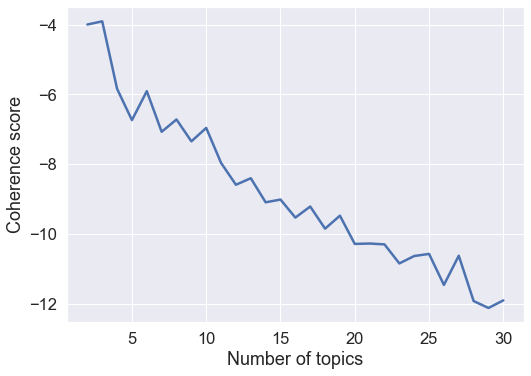

In [51]:
# Set figure size
sns.set(rc={'figure.figsize':(8.2,5.8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Generate the plot
fig = sns.lineplot(x= K, y = model_coherence)    

# Add x and y labels
labels = fig.set(xlabel='Number of topics', ylabel='Coherence score')

The plot above shows that the `u_mass` coherence score decreases rapidly after 6–8 topics. We now can retrain the LDA model using, for example, 8 topics.

#### Retrain the LDA model with 8 topics 

In [52]:
# Set model parameters
num_topics = 5
chunksize = 2000
passes = 20
iterations = 400

# Train the LDA model
LDAModel = LdaModel(
    corpus=VaccineTweets_corpus,
    id2word=VaccineTweets_dictionary,
    chunksize=chunksize,
    iterations=iterations,
    num_topics=num_topics,
    passes=passes
)

# Compute Coherence Score
coherence_LDAModel = CoherenceModel(model=LDAModel, corpus=VaccineTweets_corpus, dictionary=VaccineTweets_dictionary, coherence='u_mass')
coherence_LDAModel = coherence_LDAModel.get_coherence()
print('\nCoherence Score: ', coherence_LDAModel)


Coherence Score:  -6.343706287738272


#### What is the topic distribution for each document in our corpus?  

In [53]:
# Get the topic distribution for one document in your corpus, for example document 0 in your corpus
get_document_topics = LDAModel.get_document_topics(VaccineTweets_corpus)
print(get_document_topics[0])

[(0, 0.06744932), (1, 0.72503155), (2, 0.06717993), (3, 0.071757734), (4, 0.06858143)]


In [54]:
# Get the topic distribution for all documents in your corpus
# Columns represent topics and rows represent documents
get_document_topics = [LDAModel.get_document_topics(item) for item in VaccineTweets_corpus]
get_document_topics

[[(0, 0.067449406),
  (1, 0.7250114),
  (2, 0.06718001),
  (3, 0.071777664),
  (4, 0.06858155)],
 [(0, 0.025003383),
  (1, 0.34520763),
  (2, 0.02649586),
  (3, 0.025575645),
  (4, 0.5777175)],
 [(0, 0.14791189),
  (1, 0.3499205),
  (2, 0.46170774),
  (3, 0.020235613),
  (4, 0.020224294)],
 [(0, 0.02863075),
  (1, 0.6744391),
  (2, 0.23890524),
  (3, 0.028829835),
  (4, 0.02919512)],
 [(0, 0.3293014),
  (1, 0.03416951),
  (2, 0.034184553),
  (3, 0.56845444),
  (4, 0.03389011)],
 [(0, 0.028836412),
  (1, 0.028798202),
  (2, 0.029257568),
  (3, 0.028659446),
  (4, 0.88444835)],
 [(0, 0.24872659),
  (1, 0.19890533),
  (2, 0.5016085),
  (3, 0.025620203),
  (4, 0.025139365)],
 [(0, 0.033381116),
  (1, 0.694403),
  (2, 0.20478867),
  (3, 0.033335645),
  (4, 0.034091588)],
 [(0, 0.022442937),
  (1, 0.022396015),
  (2, 0.023006132),
  (3, 0.022422733),
  (4, 0.90973216)],
 [(0, 0.02047264),
  (1, 0.15476508),
  (2, 0.5568246),
  (3, 0.020146942),
  (4, 0.2477907)],
 [(0, 0.31936008),
  (1, 0.5

### Interactive topic model visualization via [pyLDAvis](http://bl.ocks.org/AlessandraSozzi/raw/ce1ace56e4aed6f2d614ae2243aab5a5/)

In [55]:
vis = pyLDAvis.gensim_models.prepare(topic_model=LDAModel, 
                              corpus=VaccineTweets_corpus, 
                              dictionary=VaccineTweets_dictionary)
# pyLDAvis.show(vis)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/Users/valentindanchev/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


## Acknowledgements

1. David Blei. 2012. [Probabilistic topic models](http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf). _Communications of the ACM._ 
2. [Gensim’s LDA model](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html).
3. Dirk Hovy. 2020. [Text Analysis in Python for Social Scientists](https://www.cambridge.org/core/elements/text-analysis-in-python-for-social-scientists/BFAB0A3604C7E29F6198EA2F7941DFF3). Cambridge University Press.
4. Daniel Chen. 2018. [Pandas for Everyone.](https://www.pearson.com/us/higher-education/program/Chen-Pandas-for-Everyone-Python-Data-Analysis/PGM335102.html). Addison-Wesley Professional. 